In [4]:
import seaborn as sns 
import numpy  as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics, model_selection, svm


In [2]:
df = pd.read_csv("heart.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
'''
1. age - age in years

2. sex - sex (1 = male; 0 = female)

3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)

5. chol - serum cholestoral in mg/dl

6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest

11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)

12. ca - number of major vessels (0-3) colored by flourosopy

13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect

14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter narrowing; Value 1 = > 50% diameter narrowing)
'''

'\n\n\n\n1. age - age in years\n\n2. sex - sex (1 = male; 0 = female)\n\n3. cp - chest pain type (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)\n\n4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)\n\n5. chol - serum cholestoral in mg/dl\n\n6. fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)\n\n7. restecg - resting electrocardiographic results (1 = normal; 2 = having ST-T wave abnormality; 0 = hypertrophy)\n\n8. thalach - maximum heart rate achieved\n\n9. exang - exercise induced angina (1 = yes; 0 = no)\n\n10. oldpeak - ST depression induced by exercise relative to rest\n\n11. slope - the slope of the peak exercise ST segment (2 = upsloping; 1 = flat; 0 = downsloping)\n\n12. ca - number of major vessels (0-3) colored by flourosopy\n\n13. thal - 2 = normal; 1 = fixed defect; 3 = reversable defect\n\n14. num - the predicted attribute - diagnosis of heart disease (angiographic disease status) (Value 0 = < diameter na

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

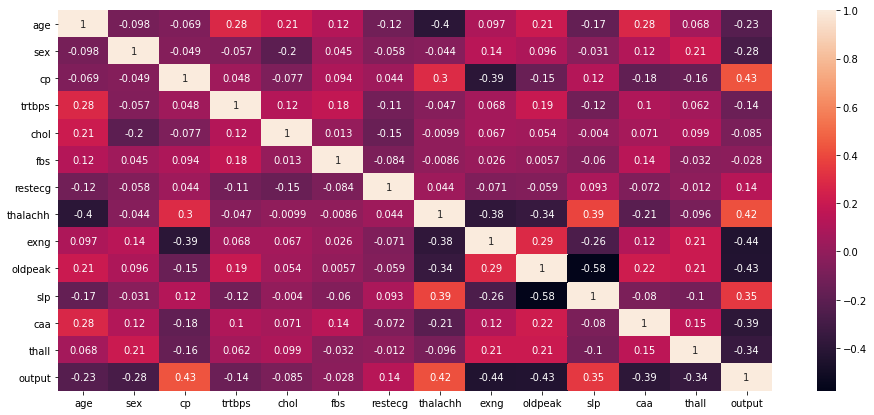

In [17]:
pd.DataFrame(df.corr()['output']).sort_values(by='output',ascending=False)
def resizeplot(l,a):
    plt.figure(figsize=(l,a))
resizeplot(16,7)
sns.heatmap(df.corr(),annot=True)

In [20]:
pd.DataFrame(df.corr()['output']).sort_values(by='output',ascending=False)


,output
output,1.000000
cp,0.433798
thalachh,0.421741
slp,0.345877
restecg,0.137230
fbs,-0.028046
chol,-0.085239
trtbps,-0.144931
age,-0.225439
sex,-0.280937


0...1...2...3...4...5...6...7...

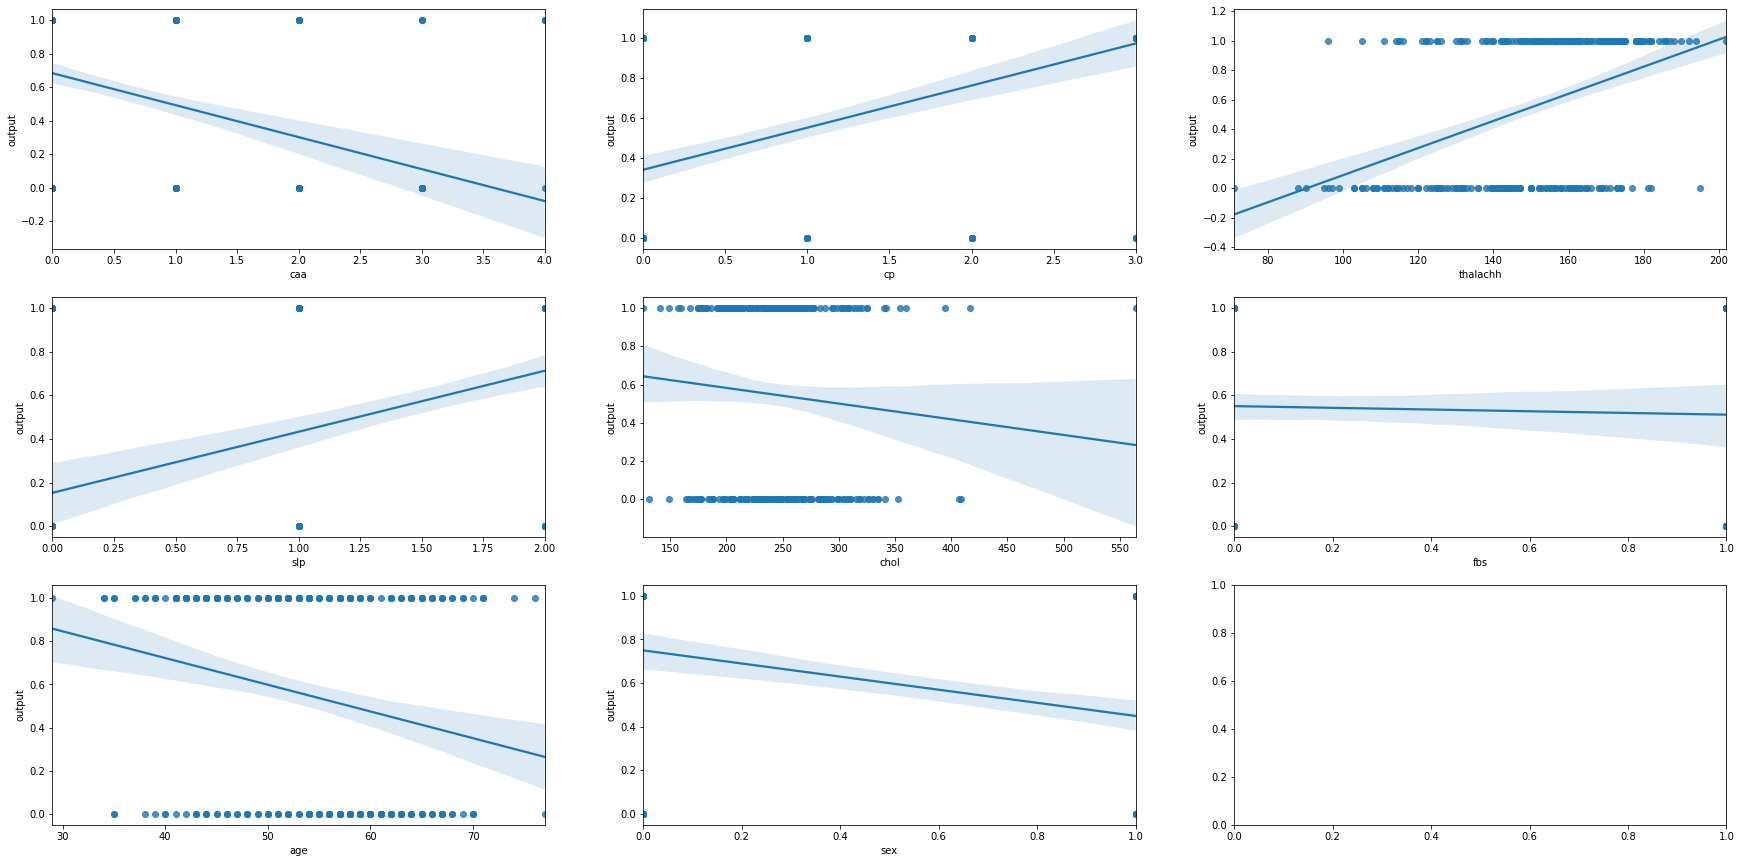

In [21]:
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,15))


# 8 Features
index=0
for row in range(num_rows):
    for col in range(num_cols): 
        if index == len(sel_cols):
            break
        print(index, end='...')
        sns.regplot(y='output',x=sel_cols[index], data=df, ax=axes[row, col])
        index+=1 
        
           
plt.show()

In [28]:
df.corr()['output'] 


age        -0.225439
sex        -0.280937
cp          0.433798
trtbps     -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalachh    0.421741
exng       -0.436757
oldpeak    -0.430696
slp         0.345877
caa        -0.391724
thall      -0.344029
output      1.000000
Name: output, dtype: float64

In [39]:
array = df.corr()['output'].apply(lambda x: 'True' if x >= 0.3 else 'False')
value = []

for _ in range(len(array)):
    print(_)
    if _ == True:
        print(_)
        value.append(_)
        
    else:
        pass
    print(value)
    
print(value)

0
[]
1
1
[1]
2
[1]
3
[1]
4
[1]
5
[1]
6
[1]
7
[1]
8
[1]
9
[1]
10
[1]
11
[1]
12
[1]
13
[1]
[1]


In [31]:
df.main

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
298    NaN
299    NaN
300    NaN
301    NaN
302    NaN
Name: main, Length: 303, dtype: object